## Статистическая значимость

#### 1. Может ли быть так, чтобы линейная зависимость в данных наблюдалась в результате случайного совпадения?

#### 2. Как добиться 95%-ной уверенности в том, что корреляция между двумя переменными значима, а не случайна?

**Нулевая гипотеза H0** заключается в том, что между двумя переменными нет связи, или, говоря более формально, коэффициент корреляции равен 0.
**Альтернативная гипотеза H1** заключается в том, что связь есть, и она может быть как положительной, так и отрицательной. 

Для проверки гипотез в контексте линейной регрессии мы будем использовать **распределение Стьюдента**, а не нормальное. Сначала построим график распределения Стьюдента и выделим на нем 95%-ный критический интервал.

### Пример:

Ты хочешь проверить, отличается ли среднее время реакции у людей после кофеина от 300 мс. 
- H0: среднее = 300 мс
- H1: среднее != 300 мс
  
Ты проводишь t-тест и получаешь t-статистику, которая показывает, насколько далеко твои данные от предполагаемого значения (300 мс).

[307.64052346 294.00157208 299.78737984 312.40893199 308.6755799
 280.2272212  299.50088418 288.48642792 288.96781148 294.10598502
 291.44043571 304.54273507 297.61037725 291.21675016 294.43863233
 293.33674327 304.94079073 287.94841736 293.13067702 281.45904261]
Среднее время реакции (мс):  295.69
t-статистика:  -2.208
p-значение:  0.0397
95%-ный доверительный интервал:  (np.float64(291.61), np.float64(299.78))


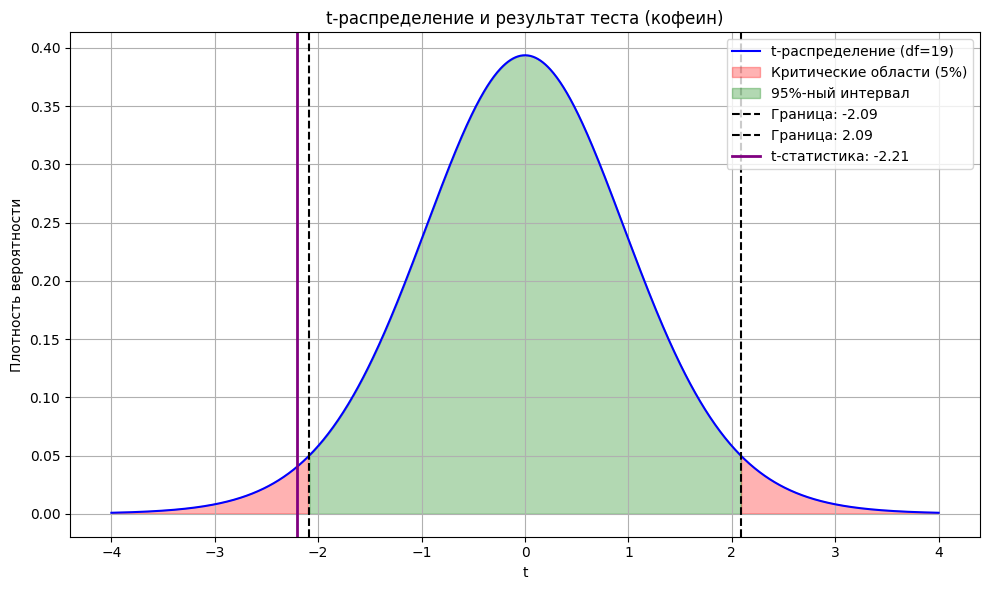

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Генерация данных: время реакции после кофеина
np.random.seed(0)
sample_size = 20
true_mean = 290 # реальное среднее после кофеина
reaction_times = np.random.normal(loc=true_mean, scale=10, size=sample_size)

print(reaction_times)

# 2. Проведение t-теста против среднего 300 мс
t_stat, p_value = stats.ttest_1samp(reaction_times, popmean=300)

# 3. Расчет доверительного интервала
sample_mean = np.mean(reaction_times)
sample_std = np.std(reaction_times, ddof=1)
df = sample_size - 1
conf_interval = stats.t.interval(0.95, df, loc=sample_mean, scale=sample_std / np.sqrt(sample_size))

# 4. Печать результатов
print("Среднее время реакции (мс): ", round(sample_mean, 2))
print("t-статистика: ", round(t_stat, 3))
print("p-значение: ", round(p_value, 4))
print("95%-ный доверительный интервал: ", (round(conf_interval[0], 2), round(conf_interval[1], 2)))

# 5. Построение графика t-распределения
x = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(x, df)

# Критические значения для 95% доверительного интервала
alpha = 0.05
t_crit_low = stats.t.ppf(alpha / 2, df)
t_crit_high = stats.t.ppf(1 - alpha / 2, df)

# График
plt.figure(figsize=(10, 6))
plt.plot(x, t_pdf, label=f't-распределение (df={df})', color='blue')

# Критические зоны
plt.fill_between(x, t_pdf, where=(x < t_crit_low) | (x > t_crit_high),
                 color='red', alpha=0.3, label='Критические области (5%)')
plt.fill_between(x, t_pdf, where=(x >= t_crit_low) & (x <= t_crit_high),
                 color='green', alpha=0.3, label='95%-ный интервал')

# Вертикальные линии: критические границы и t-статистика
plt.axvline(t_crit_low, color='black', linestyle='--', label=f'Граница: {t_crit_low:.2f}')
plt.axvline(t_crit_high, color='black', linestyle='--', label=f'Граница: {t_crit_high:.2f}')
plt.axvline(t_stat, color='purple', linestyle='-', linewidth=2, label=f't-статистика: {t_stat:.2f}')

# Оформление графика
plt.title("t-распределение и результат теста (кофеин)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🟩 95%-ный доверительный интервал (зелёная зона) - нормальное колебание, в которых t-значение обычно лежит при верной нулевой гипотезе.
🟥 Критические зоны (красные области) - редкие значения, при которых гипотезу H0 отвергают.
🟣 Наша t-статистика (фиолетовая линия) попадает в критическую зону - это говорит, что наблюдаемое отличие статистически значимо.

#### Выводы:
- **t-статистика** находится за пределами доверительного интервала, в критической зоне.
- **p-значение** меньше 0.05 (p = 0.0397), что означает, что вероятность получить такое отклонение слайчно (при условии верности H0) - менее 4%.
- Поэтому мы отвергаем нулевую гипотезу: есть статистически значимое основание считать, что время **реакции после кофеина действительно отличается от 300 мс** и составляет в среднем около 295.69 мс.

### Тест, где нулевая гипотеза верна

Среднее время реакции (мс):  298.67
t-статистика:  -0.529
p-значение:  0.6032
95%-ный доверительный интервал:  (np.float64(293.39), np.float64(303.95))


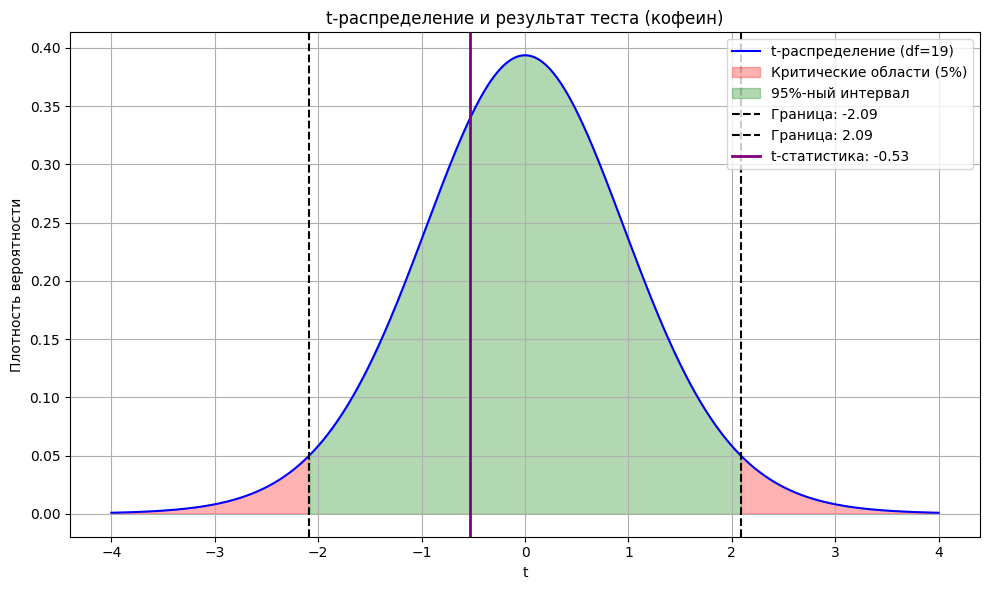

In [7]:
# Повторяем расчёты после сброса окружения

import numpy as np
import scipy.stats as stats

# Генерация новой выборки: среднее действительно 300 мс
np.random.seed(1)
sample_size = 20
true_mean = 300
reaction_times_new = np.random.normal(loc=true_mean, scale=10, size=sample_size)

# t-тест
t_stat_new, p_value_new = stats.ttest_1samp(reaction_times_new, popmean=300)

# Расчёт доверительного интервала
sample_mean_new = np.mean(reaction_times_new)
sample_std_new = np.std(reaction_times_new, ddof=1)
df_new = sample_size - 1
conf_interval_new = stats.t.interval(0.95, df_new, loc=sample_mean_new, scale=sample_std_new / np.sqrt(sample_size))

print("Среднее время реакции (мс): ", round(sample_mean_new, 2))
print("t-статистика: ", round(t_stat_new, 3))
print("p-значение: ", round(p_value_new, 4))
print("95%-ный доверительный интервал: ", (round(conf_interval_new[0], 2), round(conf_interval_new[1], 2)))

# 5. Построение графика t-распределения
x = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(x, df)

# Критические значения для 95% доверительного интервала
alpha = 0.05
t_crit_low = stats.t.ppf(alpha / 2, df)
t_crit_high = stats.t.ppf(1 - alpha / 2, df)

# График
plt.figure(figsize=(10, 6))
plt.plot(x, t_pdf, label=f't-распределение (df={df})', color='blue')

# Критические зоны
plt.fill_between(x, t_pdf, where=(x < t_crit_low) | (x > t_crit_high),
                 color='red', alpha=0.3, label='Критические области (5%)')
plt.fill_between(x, t_pdf, where=(x >= t_crit_low) & (x <= t_crit_high),
                 color='green', alpha=0.3, label='95%-ный интервал')

# Вертикальные линии: критические границы и t-статистика
plt.axvline(t_crit_low, color='black', linestyle='--', label=f'Граница: {t_crit_low:.2f}')
plt.axvline(t_crit_high, color='black', linestyle='--', label=f'Граница: {t_crit_high:.2f}')
plt.axvline(t_stat_new, color='purple', linestyle='-', linewidth=2, label=f't-статистика: {t_stat_new:.2f}')

# Оформление графика
plt.title("t-распределение и результат теста (кофеин)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### Выводы:
- **p-значение** значительно больше 0.05 -> нет оснований отвергать нулевую гипотезу.
- **t-статистика** находится внутри доверительного интервала.
- Это означает, что наблюдаемое среднее **не отличается статистически значимо** от 300 мс.